<a href="https://colab.research.google.com/github/beatricekiplagat/beatricekiplagat-Week-2-Core-Independent-Project/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_06_Beatrice_Kiplagat_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question


### a) Specifying the Data Analytic Question
> To figure out how we can predict which individuals are most likely to have or use a bank account

### b) Defining the Metric for Success
> Our analysis will be deemed successful if we are able to get the specific indicators that we can use to accurately predict individuals most likely to hav a bank account.

### c) Understanding the context

> Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth. 



### d) Recording the Experimental Design
> Our experimental design will include the following:
1. Defining the question
2. Reading the Data
3. Checking the Data
4. Tidying the dataset
5. Exploratory Analysis
6. Implementing the Solution
7. Challenging the solution
8. Follow-up questions

### e) Data Relevance
> The data provided is from Kenya, Tanzania, Rwanda & Uganda from 2016-2018 and contains data on features such as age, gender, education level among other, which are very relevant in answering our question. However seeing as it was colleted over 2 years ago and with the dynamism in the banking industry, the insights provided may not present the current situation.

## 2. Reading the Data

In [ ]:
# Loading the required libraries first
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib 
from matplotlib import pyplot as plt


In [ ]:
# Loading our datasets from the urls provided
# Dataset: http://bit.ly/FinancialDataset 
#
df = pd.read_csv('http://bit.ly/FinancialDataset')
df

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
df.shape

(23524, 13)

In [ ]:
# Detecting our column names
#
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

> Our dataset has 23,524 rows and 13 columns.

> The column names are 'country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location', 'Cell Phone Access', 'household_size', 'Respondent Age', 'gender_of_respondent',  'The relathip with head', 'marital_status', 'Level of Educuation', 'Type of Job'.

In [ ]:
# Previewing the top of our dataset
#
df.head(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7.0,26.0,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7.0,32.0,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1.0,42.0,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3.0,54.0,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3.0,76.0,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [ ]:
# Previewing the bottom of our dataset
# 
df.tail(10)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23514,Uganda,2018,uniqueid_2107,No,Urban,Yes,NaN,24.0,Female,Spouse,Married/Living together,Primary education,Self employed
23515,Uganda,2018,uniqueid_2108,No,Rural,No,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23516,Uganda,2018,uniqueid_2109,No,Urban,Yes,NaN,35.0,Male,Head of Household,Married/Living together,Primary education,Self employed
23517,Uganda,2018,uniqueid_2110,No,Urban,Yes,NaN,16.0,Male,Parent,Single/Never Married,Primary education,Other Income
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
# Checking whether each column has an appropriate datatype
#
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

> We can see that most of our data consists of objects with exceptions on the year, household size & respondent age, which is appropriate for our dataframe.

In [ ]:
# Checking the dataframe's information
#
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 4. Tidying the Dataset

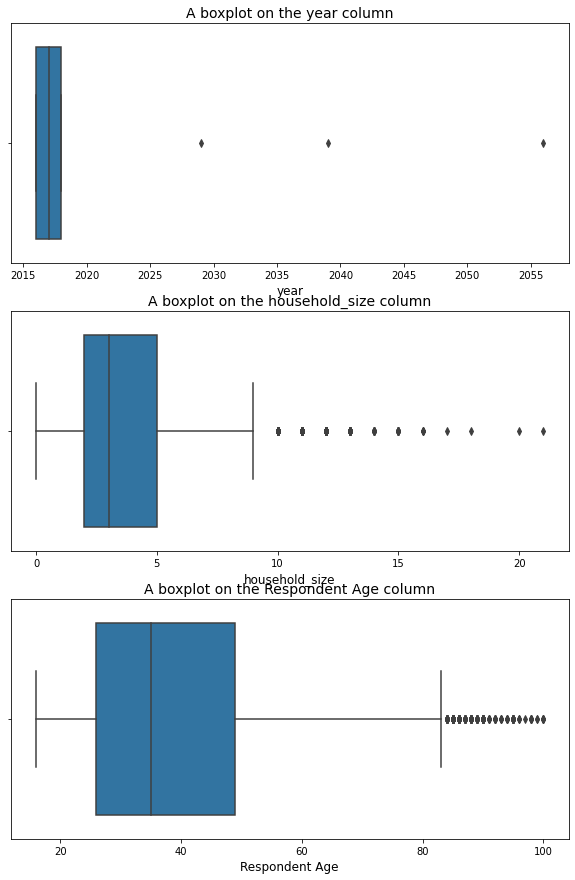

In [ ]:
# Checking for Outliers in our numerical columns
#
col_names = ['year', 'household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(x = df[col_val], ax=ax[i])
    ax[i].set_title('A boxplot on the {} column'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)


> From the 'year' column, we can see some outliers which are erroneous as the period was between 2016-2018. We shall remove those.
>
> On the 'household_size' column we also have some outliers, which may be accurate as ther isn't a limit on african household sizes. However, these will affect our summary statistics, thus we shall remove them.
>
> The  respondent age also has some outliers, which may be due to the fact that some households probably contain the grandparents and may be accurate. However, again these will affect our summary statistics thus we shall remove them
 

In [ ]:
# Removing outliers using IQR
#
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,uniqueid_2111,No,Rural,Yes,NaN,20.0,Female,Child,Single/Never Married,Primary education,No Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [ ]:
# Check the shape of the new dataset
#
df.shape

(22903, 13)

> Our new dataset now has 22,903 rows and 13 columns

In [ ]:
# Identifying Missing Data
#
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            27
Respondent Age            33
gender_of_respondent      33
The relathip with head     4
marital_status            31
Level of Educuation       29
Type of Job               30
dtype: int64

> We have some missing data in our dataset. We shall remove them.

In [ ]:
# Dealing with the Missing data and checking if there is any more missing data
#
df.fillna( method ='ffill', inplace = True)
df.isnull().sum()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
# Dropping irrelevant columns
#
drop_df = df[['uniqueid','The relathip with head']]
df = df.drop(drop_df, axis= 1)

In [ ]:
# Check for missing values
#
df.isnull().sum()

country                 0
year                    0
Has a Bank account      0
Type of Location        0
Cell Phone Access       0
household_size          0
Respondent Age          0
gender_of_respondent    0
marital_status          0
Level of Educuation     0
Type of Job             0
dtype: int64

In [ ]:
# Checking final shape of our dataset
#
df.shape

(22903, 11)

## 5. Exploratory Analysis

###a) Univariate Analysis:
We will use this to describe our data and find the trends within the different variables.


In [ ]:
# Mode
# Calculating mode across different columns

df.mode(axis=0)


,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,marital_status,Level of Educuation,Type of Job
0,Rwanda,2016,No,Rural,Yes,2.0,30.0,Female,Married/Living together,Primary education,Self employed


From the values above, we can see where most of our respondents fall in. 

In [ ]:
# Mean
# Calculating the mean for our numerical columns

df.mean(axis=0)


year              2016.966642
household_size       3.571890
Respondent Age      38.337554
dtype: float64

Since years can only be whole numbers, we'll take our average as 2016. The average household size is 3.571890≈4 since people can only be integers. The average age across our dataset is 38years old.

In [ ]:
# Median
# Calculating the median for our numerical columns

df.median(axis=0)


year              2017.0
household_size       3.0
Respondent Age      35.0
dtype: float64

The median year is 2017. Median household size is 3 while median age is 35.

In [ ]:
# Skewness
# We will now calculate the skewness to check the assymetry of the distribution

df.skew()

year              0.063181
household_size    0.612041
Respondent Age    0.741187
dtype: float64

> All our numeric data is positively skewed showing that the tail is bigger on the right side. This also means that the mean is greater than the mode.

In [ ]:
# Kurtosis
# We will now calculate the kurtosis to check the tail of our distribution

df.kurt()

year             -1.595157
household_size   -0.497274
Respondent Age   -0.235982
dtype: float64

> All our numeric data have negative kurtosis values, signifying that they are platykurtic, thus light tailed. This might e because we have removed the outliers.

In [ ]:
# Range, Standard Deviation & Variance
# We will now calculate the range, standard deviation and variance to check the spread of our data from the mean
range1 = df['Respondent Age'].max() - df['Respondent Age'].min()
range2 = df['household_size'].max() - df['household_size'].min()
std = df.std()
var = df.var()
print('Range: Respondent Age ', range1 ,'Household size ', range2)
print('Std deviation:', std)
print('Variance:', var)

Range: Respondent Age  67.0 Household size  9.0
Std deviation: year               0.844533
household_size     2.079246
Respondent Age    15.801188
dtype: float64
Variance: year                0.713235
household_size      4.323264
Respondent Age    249.677555
dtype: float64


> The years have a low standard deviation signifying that they are close, which is accurate as we only have 2016-2018.
>
> The Respondent age has a high standard deviation and variation, which shows that the data is spread over a wide range, evidenced by the range of 67.
>
> The household size has a medium range and standard deviation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Respondente')

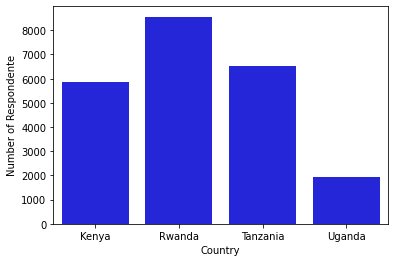

In [ ]:
# Graphical representation of the repondents by Country
sns.countplot(df.country, color='blue',saturation=0.7)
plt.xlabel('Country')
plt.ylabel('Number of Respondents')

> Rwanda had the highest number of respondents compared to the rest


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Marital Status Distribution of Respondents')

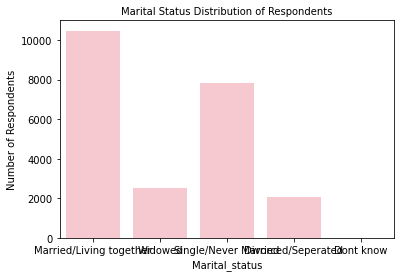

In [ ]:
# Graphical representation of marital status
sns.countplot(df.marital_status, color='pink',saturation=0.7)
plt.xlabel('Marital_status')
plt.ylabel('Number of Respondents')
plt.title('Marital Status Distribution of Respondents', fontsize=10)

> Most of the respondents are Married/Living together while the least group are those who don't know.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Household size Distribution of Respondents')

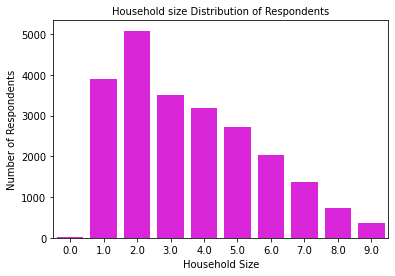

In [ ]:
# Graphical representation of household size
sns.countplot(df.household_size, color='magenta',saturation=0.7)
plt.xlabel('Household Size')
plt.ylabel('Number of Respondents')
plt.title('Household size Distribution of Respondents', fontsize=10)

> Our distribution is skewed to the right with most households consisting of between 1-4 people

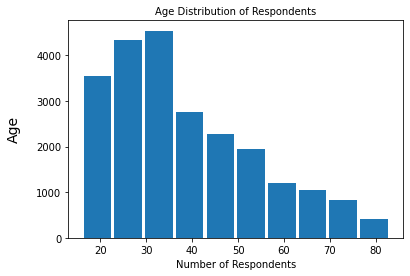

In [ ]:
# Creating a histogram to visualize the age distribution of individuals in the sample population

ages = df['Respondent Age']
plt.hist(ages, bins=10, histtype='bar', rwidth=0.9)
plt.xlabel('Number of Respondents', fontsize=10)
plt.ylabel('Age', fontsize=14, labelpad=15)
plt.title('Age Distribution of Respondents', fontsize=10)

plt.show()

> The histogram is skewed to the right, indicating thus most respondents were young, thus its mean is greater than the mode.

(-1.2057891001137713,
 1.1994799451633624,
 -1.1499156731460816,
 1.0572854009561794)

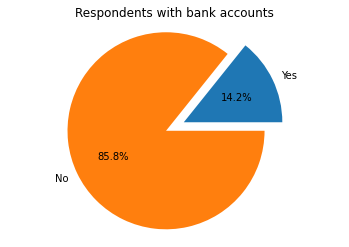

In [ ]:
# Graphical representation of number of people with bank accounts
label = df['Has a Bank account'].unique()
explode = (0.1, 0.1)
plt.pie(df['Has a Bank account'].value_counts().sort_values(),labels = label, explode = explode, autopct = '%1.1f%%')
plt.title("Respondents with bank accounts")
plt.axis('equal')

> 85.8% of our respondents do not have a bank account

(-1.1970128882250488,
 1.1779289521953529,
 -1.1821996194838795,
 1.1988454906762067)

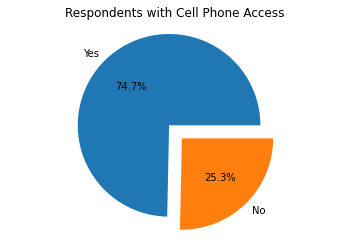

In [ ]:
# Graphical representation of number of people with Cell phone access
label = df['Cell Phone Access'].unique()
explode = (0.1, 0.1)
plt.pie(df['Cell Phone Access'].value_counts(),labels = label, explode = explode, autopct = '%1.1f%%')
plt.title("Respondents with Cell Phone Access")
plt.axis('equal')

> Most of the respondents have cell phone access

(-1.148731871642084,
 1.1366716252921583,
 -1.2235801291924011,
 1.2179585490772966)

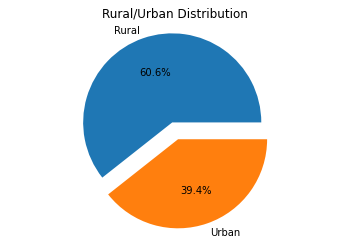

In [ ]:
# Graphical representation of the type of location
label = df['Type of Location'].unique()
explode = (0.1, 0.1)
plt.pie(df['Type of Location'].value_counts(),labels = label, explode = explode, autopct = '%1.1f%%')
plt.title("Rural/Urban Distribution")
plt.axis('equal')


###Summary

1. Most of our respondents are from Rwanda.
2. Majority are married/living together.
3. Most the households in the study have 1-4 people.
4. Our respondents mostly consist of people aged 40 and below.
5. 85.8% of our respondents do not have bank accounts.
6. 74.7% of our respondents have cell phone access.
7. 60.6% of our respondents are from rural


###b) Bivariate Analysis:
We will use this now to check the relationships and measure the strengths of these relationships between 2 variables.

In [ ]:
# Check for correlation in our numerical data
#
correlation = df[].corr()
correlation

,year,household_size,Respondent Age
year,1.000000,-0.097576,-0.023867
household_size,-0.097576,1.000000,-0.105352
Respondent Age,-0.023867,-0.105352,1.000000


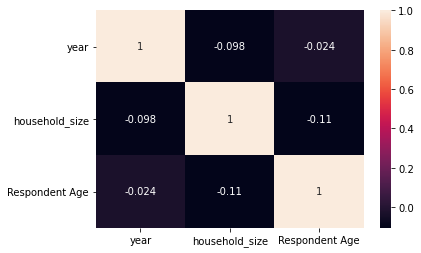

In [ ]:
# Plotting a correlation heatmap
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

> From this,we can see that household size and the respondent age are weakly negatively correlated at -0.105352. The 2 variables are also weakly negatively correlated to the year. 

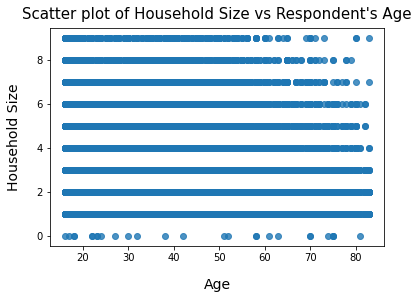

In [ ]:
# Creating a scatterplot to check the linear regression betweeen age and household size
sns.regplot(x = df["Respondent Age"], y = df["household_size"], fit_reg=False)

plt.title("Scatter plot of Household Size vs Respondent's Age", fontsize=15, y=1.015)
plt.xlabel('Age', fontsize=14, labelpad=15)
plt.ylabel('Household Size', fontsize=14, labelpad=15)
plt.show()

> Thus we cannot use the respondent's age to predict the household size


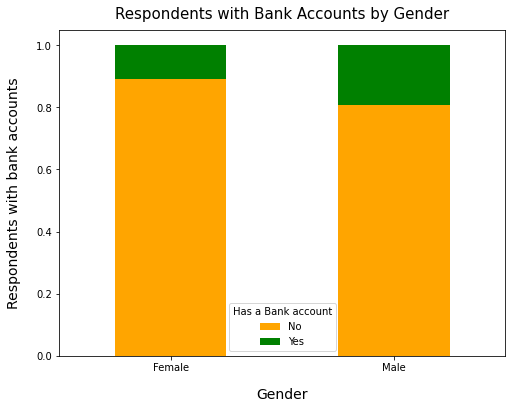

In [ ]:
# Checking relationship between respondents with bank accounts and gender
gender = df.groupby('gender_of_respondent')['Has a Bank account'].value_counts(normalize=True).unstack()
colors= ['orange', 'green']
gender.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
plt.title('Respondents with Bank Accounts by Gender', fontsize=15, y=1.015)
plt.xlabel('Gender', fontsize=14, labelpad=15)
plt.xticks(rotation = 360)
plt.ylabel('Respondents with bank accounts', fontsize=14, labelpad=15)
plt.show()

> From our plot, we can see that males have a higher likelihood of having a bank account as compared to females.

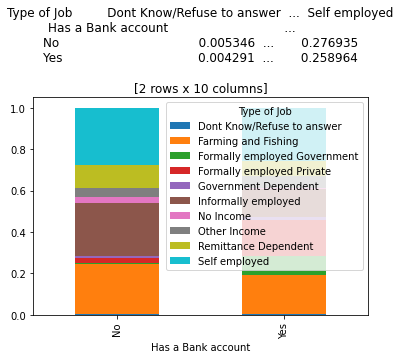

In [ ]:
# Checking respondents with which type of job are more likely to have a bank account
ax1 = df.groupby('Has a Bank account')['Type of Job'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True',title=str(ax1))
int_level = df['Has a Bank account'].value_counts()

> From our plot we are able to see that self employed individuals are more likely to have a bank account as compared to the other occupations. Those in informal employment are less likely.

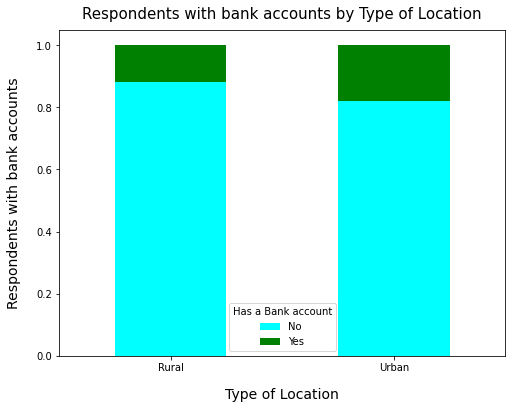

In [ ]:
# Checking whether respondents from urban or rural are more likely to have a bank account
location=df.groupby('Type of Location')['Has a Bank account'].value_counts(normalize=True).unstack()
colors= ['cyan', 'green']
location.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
plt.title('Respondents with bank accounts by Type of Location', fontsize=15, y=1.015)
plt.xlabel('Type of Location', fontsize=14, labelpad=15)
plt.xticks(rotation = 360)
plt.ylabel('Respondents with bank accounts', fontsize=14, labelpad=15)
plt.show()

> Respondents from the urban areas are more likely to have bank accounts as compared to their counterparts in the rural areas.

In [ ]:
# Descriptive Statistics
!pip install researchpy
import researchpy as rp


rp.summary_cont(df.groupby("Has a Bank account")['Respondent Age'])

,N,Mean,SD,SE,95% Conf.,Interval
Has a Bank account,,,,,,
No,19640,38.1771,16.0843,0.1148,37.9522,38.4021
Yes,3263,39.3031,13.9397,0.2440,38.8246,39.7816



###Summary

1.  Household size and the respondent age are weakly negatively correlated at -0.105352.  
2. We cannot use the respondent's age to predict the household size.
3. Males have a higher likelihood of having a bank account as compared to females.
4. Self employed individuals are more likely to have a bank account as compared to other occupations. Those in informal employment are less likely.
5. Respondents from the urban areas are more likely to have bank accounts as compared to their counterparts in the rural areas.

###c) Multivariate Analysis:

## 6. Implementing the Solution

In [ ]:
# Implementing the Solution
# 

## 7. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 8. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



#### a). Did we have the right data?

#### b). Do we need other data to answer our question?

#### c). Did we have the right question?